## eBay Classifieds Data Cleaning & Analysis
Methodology:
<br> 
In this project, we wil be looking at for-sale cars data collected from the German Ebay. We will be using various data cleaning techniques to prepare the data and make insightful obeservations about the price, make, and odometer of the cars. More specifically, our goal will be to see if odometer readings are correlated to prices for the most popular car brands. 


### Step 1: Data Read-In & Exploration

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
autos = pd.read_csv('autos.csv', encoding='latin1')

In [29]:
#print the first few columns to get familiar with the data 
print(autos.head())
#print number of non_null entries corresponding to every column
autos.info()

           dateCrawled                            name  seller offerType  \
0  2016-03-24 11:52:17                      Golf_3_1.6  privat   Angebot   
1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   Angebot   
2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   Angebot   
3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   Angebot   
4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   

   price abtest vehicleType  yearOfRegistration    gearbox  powerPS  model  \
0    480   test         NaN                1993    manuell        0   golf   
1  18300   test       coupe                2011    manuell      190    NaN   
2   9800   test         suv                2004  automatik      163  grand   
3   1500   test  kleinwagen                2001    manuell       75   golf   
4   3600   test  kleinwagen                2008    manuell       69  fabia   

   kilometer  monthOfRegistration fuelType       brand notRepairedDamage  

>We can see that the 'name' column will need to be cleaned of extraneous characters to be better understood.<br>
Using info( ), we can see that there are is only one columns with > 20% NaN values, that is 'unrepaired_damage'.
<br> Since most of our column have valid entries, we should explore columns which have a large percent of non-unique values. This will allow us to simplify our dataframe so we can extract our desired metrics.


### Step 2: Data Cleaning
In this next section we will focus on making the content our columns understandable and easily processed. We will also look for potential columns to drop. 

In [30]:
#print all of the column names
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [31]:
#rename the columns to be snakecase
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'powerPS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

In [32]:
#print a summary of each column in the dataframe
autos.describe(include = 'all')


,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,powerPS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


> From our summary, we can quickly see that 'seller', and 'offer_type' have very few unique entries. Due to the redundancies in these columns, we will be unable to make valuable extrapolations. This makes them good candidates for being dropped. We can also note there are several other column that have only two unique values, but these are Yes/No entries which are able to preserve information. 


In [34]:
#Dropped columns where > 90% of the values are the same.
autos = autos.drop("seller", axis=1).drop("offer_type", axis=1)

Next, we will be cleaning up some of the names of the columns. The 'price' and 'odometer' columns are both strings type which we need to change to float so we can run summary statistics. 

In [35]:
#change to float type and remove '$' from entries 
autos["price"] = autos["price"].str.replace("$","").str.replace(",","").astype(float)

In [36]:
autos["odometer"] = autos["odometer"].str.replace("km","").str.replace(",","").astype(float)   
#rename column after conversion to float to designate units 
autos.rename({'odometer': 'odometer_km'}, axis=1, inplace=True)

Since, our main question relates to odometer values, we will explore the column individually.

In [37]:
odo_vals = autos["odometer_km"]
print(odo_vals.unique().shape)
print(odo_vals.describe())
odo_vals.value_counts()

(13,)
count    371528.000000
mean     125618.688228
std       40112.337051
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64


150000    240797
125000     38067
100000     15920
90000      12523
80000      11053
70000       9773
60000       8669
50000       7615
5000        7069
40000       6376
30000       6041
20000       5676
10000       1949
Name: odometer_km, dtype: int64

> There are no obvious outlier values to be removed from odo_vals since all values appear to meaningful

In [38]:
pr = autos["price"]
pr_5 = autos["price"] < 60000
print(pr.describe())
print(pr.value_counts().sort_index(ascending=False))
print(pr_5.value_counts())

count    3.715280e+05
mean     1.729514e+04
std      3.587954e+06
min      0.000000e+00
25%      1.150000e+03
50%      2.950000e+03
75%      7.200000e+03
max      2.147484e+09
Name: price, dtype: float64
2147483647        1
99999999         15
99000000          1
74185296          1
32545461          1
              ...  
4                 1
3                 8
2                12
1              1189
0             10778
Name: price, Length: 5597, dtype: int64
True     370458
False      1070
Name: price, dtype: int64


In [39]:
autos = autos[autos['price'].between(100, 100001)]

>The price column has around 2,000 distinct values. We removed any prices that were unrealistically high i.e. anything above 100,000. We can also remove any entries below 100 since anything below is likely not reflective of the actual cost.

In [40]:
autos.describe()

,price,registration_year,powerPS,odometer_km,registration_month,nr_of_pictures,postal_code
count,357805.000000,357805.000000,357805.000000,357805.000000,357805.000000,357805.0,357805.000000
mean,5816.364481,2004.294445,116.710856,125871.606042,5.816741,0.0,51005.776325
std,7562.614881,72.258264,188.963362,39527.680682,3.676157,0.0,25750.234413
min,100.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1290.000000,1999.000000,73.000000,125000.000000,3.000000,0.0,30826.000000
50%,3100.000000,2004.000000,107.000000,150000.000000,6.000000,0.0,49757.000000
75%,7499.000000,2008.000000,150.000000,150000.000000,9.000000,0.0,71672.000000
max,100000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


> After removing outlier values, we can better understand the prices. The average cost now seems to be around 5,000.

#### Observations about date ranges: 

In [41]:
print(autos["date_crawled"].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=False))

2016-04-07    0.001601
2016-04-06    0.003127
2016-04-05    0.012761
2016-04-04    0.037649
2016-04-03    0.038879
2016-04-02    0.035148
2016-04-01    0.034192
2016-03-31    0.031880
2016-03-30    0.033563
2016-03-29    0.034122
2016-03-28    0.035055
2016-03-27    0.030206
2016-03-26    0.032034
2016-03-25    0.032783
2016-03-24    0.029888
2016-03-23    0.031970
2016-03-22    0.032442
2016-03-21    0.035623
2016-03-20    0.036363
2016-03-19    0.035248
2016-03-18    0.013102
2016-03-17    0.031618
2016-03-16    0.030209
2016-03-15    0.033398
2016-03-14    0.036324
2016-03-13    0.015816
2016-03-12    0.036344
2016-03-11    0.032755
2016-03-10    0.032652
2016-03-09    0.034128
2016-03-08    0.033468
2016-03-07    0.035631
2016-03-06    0.014441
2016-03-05    0.025578
Name: date_crawled, dtype: float64


In [42]:
print(autos["ad_created"].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=False))

2016-04-07    0.001537
2016-04-06    0.003119
2016-04-05    0.011593
2016-04-04    0.037755
2016-04-03    0.039066
                ...   
2015-08-07    0.000003
2015-06-18    0.000003
2015-06-11    0.000003
2015-03-20    0.000003
2014-03-10    0.000003
Name: ad_created, Length: 114, dtype: float64


In [43]:
print(autos["last_seen"].str[:10].value_counts(normalize=True, dropna=False).sort_index(ascending=False))

2016-04-07    0.130431
2016-04-06    0.218996
2016-04-05    0.126913
2016-04-04    0.025542
2016-04-03    0.025349
2016-04-02    0.024972
2016-04-01    0.023938
2016-03-31    0.024251
2016-03-30    0.023703
2016-03-29    0.023281
2016-03-28    0.022194
2016-03-27    0.016663
2016-03-26    0.015939
2016-03-25    0.018980
2016-03-24    0.019184
2016-03-23    0.018004
2016-03-22    0.020483
2016-03-21    0.020014
2016-03-20    0.019891
2016-03-19    0.016347
2016-03-18    0.006892
2016-03-17    0.028745
2016-03-16    0.016459
2016-03-15    0.016285
2016-03-14    0.012166
2016-03-13    0.008421
2016-03-12    0.023264
2016-03-11    0.012957
2016-03-10    0.011467
2016-03-09    0.009804
2016-03-08    0.007912
2016-03-07    0.005193
2016-03-06    0.004092
2016-03-05    0.001272
Name: last_seen, dtype: float64


> We can see that "date_crawled" and "last_seen" have a smaller date range since they describe more recent occurences. In contrast, "ad_created" has a much larger range.

In [44]:
print(autos["registration_year"].describe())
autos["registration_year"].value_counts().sort_index(ascending=False).head(20)

count    357805.000000
mean       2004.294445
std          72.258264
min        1000.000000
25%        1999.000000
50%        2004.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64


9999    13
9450     1
9000     4
8888     1
8500     1
8200     1
7800     1
7777     1
7500     1
7100     1
7000     4
6200     1
6000     6
5911     2
5900     1
5600     1
5555     2
5300     1
5000    14
4800     1
Name: registration_year, dtype: int64

> The registration year column has some outlier values (> 2020) which we will need to investigate.

In [45]:
aut1 = autos["registration_year"] < 1990
aut2 = autos["registration_year"] > 2016
print(aut1.value_counts().sort_index(ascending=False))
aut2.value_counts().sort_index(ascending=False)

True       9578
False    348227
Name: registration_year, dtype: int64


True      13828
False    343977
Name: registration_year, dtype: int64

> Since there are very few values outside of the range 1990-2016, it is safe for our analysis to continue within this range.

In [46]:
autos = autos[autos["registration_year"].between(1990, 2017)]
autos["registration_year"].value_counts(normalize=True)

2000    0.065942
1999    0.063546
2005    0.062619
2006    0.057973
2001    0.057090
2003    0.056800
2004    0.056428
2002    0.054508
2007    0.050704
1998    0.049565
2008    0.046452
2009    0.044930
1997    0.040307
2010    0.035506
2011    0.034745
1996    0.029904
2017    0.028853
2012    0.027107
2016    0.026288
1995    0.025400
2013    0.017663
2014    0.013774
1994    0.013330
1993    0.009392
1992    0.008320
2015    0.008181
1991    0.007641
1990    0.007031
Name: registration_year, dtype: float64

>Within this range, the percentage values are more significant and will give us an ccurate depiction of the registration years.

#### Aggregation for "brand" column: 
In the following section we will create two dictionaries which group the cars by brand. This will help us get closer towards answering our question about the relationship between odometer values and price.

In [51]:
#get most popular brands by percentage
autos['brand'].value_counts(normalize=True).sort_values(ascending=False)

volkswagen        0.212994
bmw               0.110047
opel              0.108267
mercedes_benz     0.094324
audi              0.090392
ford              0.069032
renault           0.048952
peugeot           0.030749
fiat              0.025737
seat              0.019382
skoda             0.015950
mazda             0.015726
smart             0.014800
citroen           0.013966
nissan            0.013870
toyota            0.013109
hyundai           0.010269
mini              0.009531
volvo             0.008971
mitsubishi        0.008405
honda             0.007652
kia               0.007138
sonstige_autos    0.006360
suzuki            0.006302
alfa_romeo        0.006110
porsche           0.004911
chevrolet         0.004452
chrysler          0.003825
dacia             0.002547
daihatsu          0.002164
subaru            0.002100
jeep              0.002085
land_rover        0.002050
jaguar            0.001542
daewoo            0.001516
saab              0.001411
rover             0.001301
l

In [52]:
brands = autos['brand'].value_counts(normalize=True).sort_values(ascending=False)[0:20].index
price_by_brand = {}
#use loop to get mean prices for each corresponding brand
for brand in brands:
    price_mean = autos.loc[autos['brand'] == brand, 'price'].mean()
    price_by_brand[brand] = price_mean
    
price_by_brand
    

{'volkswagen': 5350.888752539508,
 'bmw': 8398.287467342254,
 'opel': 2944.476528969957,
 'mercedes_benz': 8317.109516918625,
 'audi': 9085.51065060241,
 'ford': 3542.058224652924,
 'renault': 2402.9295206454676,
 'peugeot': 3248.9313373630525,
 'fiat': 2753.3856917174453,
 'seat': 4503.781690140845,
 'skoda': 6502.054624908958,
 'mazda': 4069.7076638965837,
 'smart': 3612.3569466248036,
 'citroen': 3560.1376585568723,
 'nissan': 4712.568886097152,
 'toyota': 5274.8863535666815,
 'hyundai': 5532.62584841629,
 'mini': 10032.441194393663,
 'volvo': 5204.099708643574,
 'mitsubishi': 3370.8217000691084}

> We chose to aggregate by the top 20 values in the column to gain price insights about the more popoular brands.

Now, we will go through the same process but we will aggregate by brand to get the mean mileage.

In [49]:
mileage_by_brand = {}

for brand in brands:
    mileage_mean = autos.loc[autos['brand'] == brand, 'odometer_km'].mean()
    mileage_by_brand[brand] = mileage_mean
    
mileage_by_brand

{'volkswagen': 129160.08780900178,
 'bmw': 133213.6542369303,
 'opel': 129511.8025751073,
 'mercedes_benz': 131022.81474183318,
 'audi': 129748.1124497992,
 'ford': 124704.66975178797,
 'renault': 128293.18936877076,
 'peugeot': 124822.44049867775,
 'fiat': 118390.88241931844,
 'seat': 121041.35451003896,
 'skoda': 113947.56008739985,
 'mazda': 125896.58356417359,
 'smart': 100321.82103610675,
 'citroen': 121778.95612393429,
 'nissan': 119526.80067001675,
 'toyota': 117269.60567124502,
 'hyundai': 104585.69004524886,
 'mini': 94323.5831809872,
 'volvo': 139138.8798964066,
 'mitsubishi': 127214.92743607463}

> Now that we have the mean mileage values for each of the top 20 brands, we can see that they are surprisingly all within a relatively small range (90,000-140,000).

#### Creating a summary Dataframe: 

                 mean_price   mean_mileage
mini           10032.441194   94323.583181
audi            9085.510651  129748.112450
bmw             8398.287467  133213.654237
mercedes_benz   8317.109517  131022.814742
skoda           6502.054625  113947.560087
hyundai         5532.625848  104585.690045
volkswagen      5350.888753  129160.087809
toyota          5274.886354  117269.605671
volvo           5204.099709  139138.879896
nissan          4712.568886  119526.800670
seat            4503.781690  121041.354510
mazda           4069.707664  125896.583564
smart           3612.356947  100321.821036
citroen         3560.137659  121778.956124
ford            3542.058225  124704.669752
mitsubishi      3370.821700  127214.927436
peugeot         3248.931337  124822.440499
opel            2944.476529  129511.802575
fiat            2753.385692  118390.882419
renault         2402.929521  128293.189369


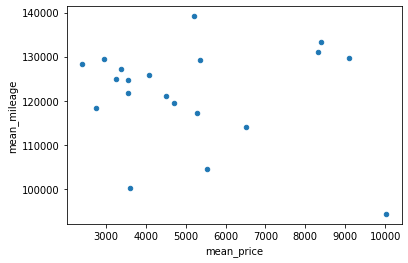

In [50]:
import seaborn as sns 
mean_price = pd.Series(price_by_brand)
mean_mileage = pd.Series(mileage_by_brand)

brand_df = pd.DataFrame({'mean_price': mean_price, 'mean_mileage': mean_mileage}).sort_values(by='mean_price',ascending=False)

print(brand_df)
ax1 = brand_df.plot.scatter(x='mean_price',y='mean_mileage')


> Converted both mean_price and mean_mileage to series to make a dataframe from which we can easily visually compare our findings. We can see that the mean_mileage stays around the same but the price varies greatly accoring to brand. 